In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pickle
from sklearn.ensemble import BaggingRegressor



In [2]:
df=pd.read_csv('CAR DETAILS.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Ambassador CLASSIC 1500 DSL AC,2005,120000,50000,Diesel,Individual,Manual,Second Owner
1,Ambassador CLASSIC 1500 DSL AC,2005,120000,50000,Diesel,Individual,Manual,Second Owner
2,Ambassador Classic 2000 Dsz,2002,50000,120000,Diesel,Individual,Manual,Fourth & Above Owner
3,Ambassador Grand 1800 ISZ MPFI PW CL,2012,430000,50000,Petrol,Individual,Manual,Second Owner
4,Audi A4 1.8 TFSI,2012,1200000,60000,Petrol,Individual,Automatic,Third Owner


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,4340.0,2013.090783,4.215344,1992.0,2011.00,2014.0,2016.0,2020.0
selling_price,4340.0,504127.311751,578548.736139,20000.0,208749.75,350000.0,600000.0,8900000.0
km_driven,4340.0,66215.777419,46644.102194,1.0,35000.00,60000.0,90000.0,806599.0


In [4]:
df.shape

(4340, 8)

In [5]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [6]:
df.duplicated().sum()

763

In [7]:
df.drop_duplicates(inplace=True)
df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Ambassador CLASSIC 1500 DSL AC,2005,120000,50000,Diesel,Individual,Manual,Second Owner
2,Ambassador Classic 2000 Dsz,2002,50000,120000,Diesel,Individual,Manual,Fourth & Above Owner
3,Ambassador Grand 1800 ISZ MPFI PW CL,2012,430000,50000,Petrol,Individual,Manual,Second Owner
4,Audi A4 1.8 TFSI,2012,1200000,60000,Petrol,Individual,Automatic,Third Owner
5,Audi A4 2.0 TDI,2011,1295000,58000,Diesel,Dealer,Automatic,First Owner


In [8]:
df["company"] = df.name.apply(lambda x: ' '.join(x.split(' ')[:1]))
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,company
0,Ambassador CLASSIC 1500 DSL AC,2005,120000,50000,Diesel,Individual,Manual,Second Owner,Ambassador
2,Ambassador Classic 2000 Dsz,2002,50000,120000,Diesel,Individual,Manual,Fourth & Above Owner,Ambassador
3,Ambassador Grand 1800 ISZ MPFI PW CL,2012,430000,50000,Petrol,Individual,Manual,Second Owner,Ambassador
4,Audi A4 1.8 TFSI,2012,1200000,60000,Petrol,Individual,Automatic,Third Owner,Audi
5,Audi A4 2.0 TDI,2011,1295000,58000,Diesel,Dealer,Automatic,First Owner,Audi


In [9]:
df['company'].value_counts()


Maruti           1072
Hyundai           637
Mahindra          328
Tata              308
Ford              220
Honda             216
Toyota            170
Chevrolet         151
Renault           110
Volkswagen         93
Nissan             52
Skoda              49
Fiat               32
Audi               31
Datsun             29
BMW                25
Mercedes-Benz      21
Mitsubishi          5
Land                5
Jaguar              5
Volvo               4
Ambassador          3
Jeep                3
OpelCorsa           2
MG                  2
Isuzu               1
Force               1
Daewoo              1
Kia                 1
Name: company, dtype: int64

In [10]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,company
0,Ambassador CLASSIC 1500 DSL AC,2005,120000,50000,Diesel,Individual,Manual,Second Owner,Ambassador
2,Ambassador Classic 2000 Dsz,2002,50000,120000,Diesel,Individual,Manual,Fourth & Above Owner,Ambassador
3,Ambassador Grand 1800 ISZ MPFI PW CL,2012,430000,50000,Petrol,Individual,Manual,Second Owner,Ambassador
4,Audi A4 1.8 TFSI,2012,1200000,60000,Petrol,Individual,Automatic,Third Owner,Audi
5,Audi A4 2.0 TDI,2011,1295000,58000,Diesel,Dealer,Automatic,First Owner,Audi
...,...,...,...,...,...,...,...,...,...
4335,Volkswagen Vento Petrol Highline AT,2011,300000,70000,Petrol,Individual,Automatic,Third Owner,Volkswagen
4336,Volvo V40 D3 R Design,2018,1975000,21000,Diesel,Dealer,Automatic,First Owner,Volvo
4337,Volvo XC 90 D5 Inscription BSIV,2017,4500000,80000,Diesel,Individual,Automatic,First Owner,Volvo
4338,Volvo XC60 D3 Kinetic,2012,1750000,115992,Diesel,Dealer,Automatic,Third Owner,Volvo


### Exploratory Data Analysis (EDA)
#### Separting Categorical and Numerical Columns

In [11]:
cat_cols=df.dtypes[df.dtypes=='object'].index
num_cols=df.dtypes[df.dtypes!='object'].index
print(num_cols,'\n',cat_cols)

Index(['year', 'selling_price', 'km_driven'], dtype='object') 
 Index(['name', 'fuel', 'seller_type', 'transmission', 'owner', 'company'], dtype='object')


In [12]:
for i in num_cols:
    print(f'Feature {i} | Unique Count {df[i].nunique()}')

Feature year | Unique Count 27
Feature selling_price | Unique Count 445
Feature km_driven | Unique Count 770


In [13]:
for i in cat_cols:
    print(f'Feature {i} | Unique Count {df[i].nunique()}')

Feature name | Unique Count 1491
Feature fuel | Unique Count 5
Feature seller_type | Unique Count 3
Feature transmission | Unique Count 2
Feature owner | Unique Count 5
Feature company | Unique Count 29


C:\Users\USER\AppData\Local\Temp/ipykernel_11260/2028955134.py:7: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout(h_pad=2.0)


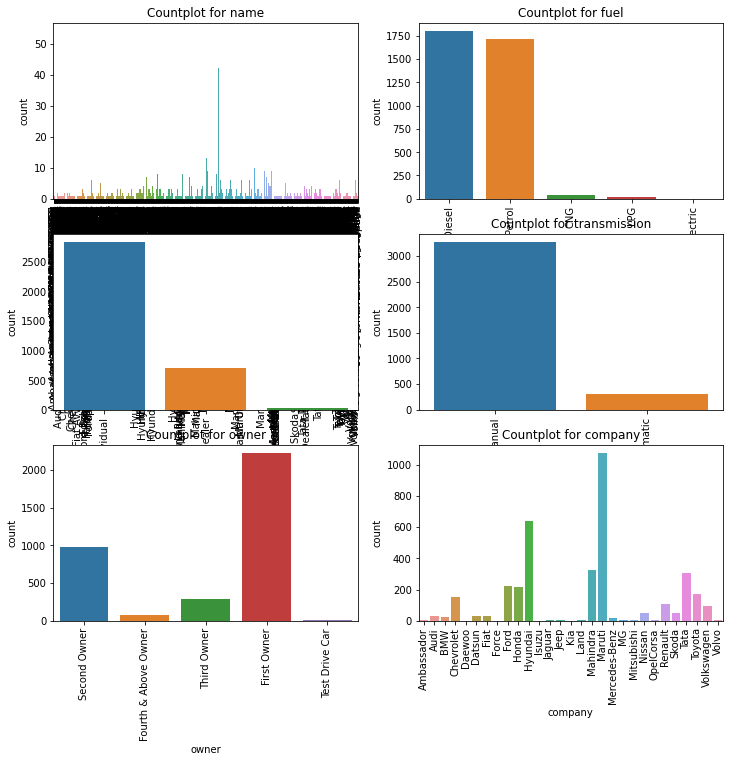

In [14]:
plt.figure(figsize=(12,11))
for i in range (len(cat_cols)):
    plt.subplot(3,2,i+1)
    sns.countplot(x=df[cat_cols[i]])
    plt.xticks(rotation=90)
    plt.title(f'Countplot for {cat_cols[i]}')
plt.tight_layout(h_pad=2.0)
plt.show()

### Insights
1) Most of the used cars available are belongs to petrol and Diesel category
2) All most all the cars transmisson are of Manually operated
3) Available cars are more likely to be First and 2nd Hand users only
4) Sellers prefer to sell their car directly to customers ( individual ) compare to Dealer or Trusted Dealer
5) Maruti, Hyundai, Mahindra, Tata are most of used cars available in market compare to other brands of cars

Variation of Cat_cols wrt selling_price - Boxplot

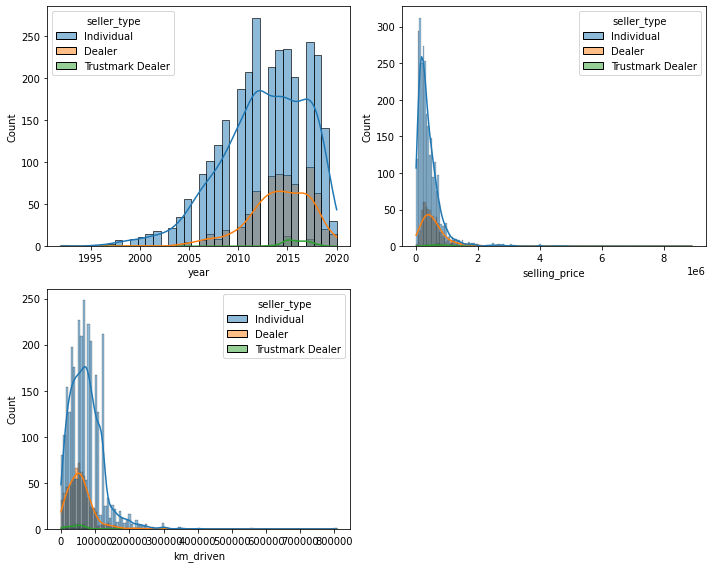

In [15]:
plt.figure(figsize=(10,8))
for i in range(len(num_cols)):
    plt.subplot(2,2,i+1)
    sns.histplot(data=df,x=num_cols[i],kde=True,hue='seller_type')
    plt.xticks(rotation=0)
#plt.savefig('Histoplot ')
plt.tight_layout()
plt.show()

#### Insights
1) Most of the available used cars released after 2005
2) 90 percentage of cars are sold for less than 1500000
3) Sellers prefers to sell their cars before reaching 200000 km 
4) Its clearly indicates individual sellers are more available in the market compare to Third party sellers

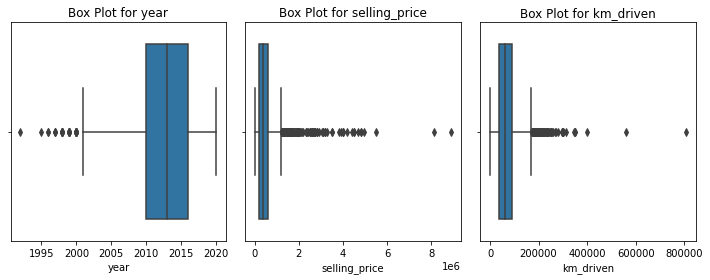

In [16]:
plt.figure(figsize=(10,4))
for i in range(len(num_cols)):
    plt.subplot(1,3,i+1)
    sns.boxplot(data=df,x=num_cols[i])  
    plt.title(f'Box Plot for {num_cols[i]}')
plt.savefig("Box Plot")
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


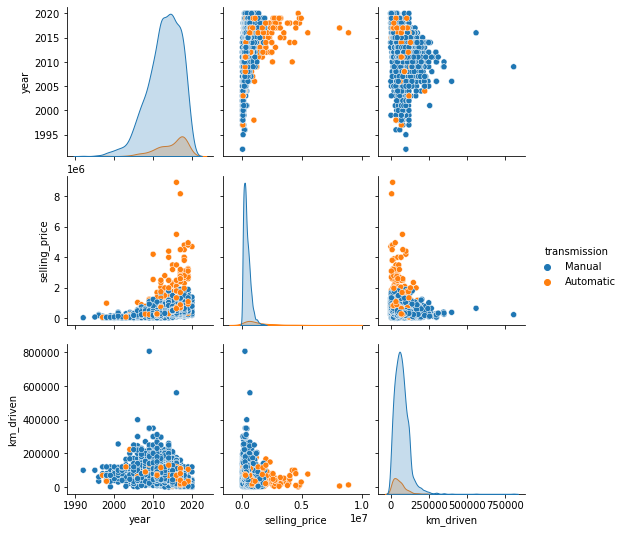

In [17]:
sns.pairplot(df,hue='transmission')
plt.savefig("Paiplot for continuous variable")
plt.show()

Treating Outliers

In [18]:
df.describe(percentiles=[0.01,0.02,0.03,0.04,0.97,0.98,0.99]).T.iloc[:,3:]

,min,1%,2%,3%,4%,50%,97%,98%,99%,max
year,1992.0,2000.00,2003.0,2004.0,2005.0,2013.0,2019.0,2019.0,2020.0,2020.0
selling_price,20000.0,51786.64,60000.0,70000.0,75000.0,350000.0,1497200.0,1800000.0,2675000.0,8900000.0
km_driven,1.0,1744.08,5000.0,6525.2,10000.0,60000.0,170000.0,193440.0,223158.4,806599.0


In [19]:
df['selling_price']=np.where(df['selling_price']<51786.64,51786.64,	df['selling_price'])
df['km_driven']=np.where(df['km_driven']>223158.4,223158.4,df['km_driven'])

In [20]:
df['selling_price']=np.where(df['selling_price']> 2675000.0,2675000.0,	df['selling_price'])
df['km_driven']=np.where(df['km_driven']< 1744.08,1744.08,df['km_driven'])

In [21]:
df.describe(percentiles=[0.01,0.02,0.03,0.04,0.97,0.98,0.99]).T.iloc[:,3:]

,min,1%,2%,3%,4%,50%,97%,98%,99%,max
year,1992.00,2000.0000,2003.0,2004.0,2005.0,2013.0,2019.0,2019.0,2020.000,2020.0
selling_price,51786.64,51948.7936,60000.0,70000.0,75000.0,350000.0,1497200.0,1800000.0,2675000.000,2675000.0
km_driven,1744.08,1754.6592,5000.0,6525.2,10000.0,60000.0,170000.0,193440.0,223038.016,223158.4


In [22]:
df['year'].value_counts()
df['year'].nunique()

27

We dont treat year for outliers as it is a categorical columns with 27 different values.

### Correlation Map

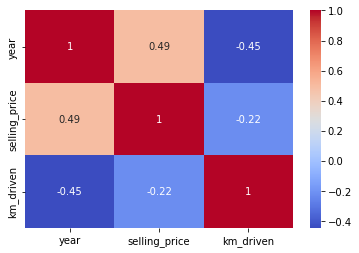

In [23]:
corr=df[num_cols].corr()
sns.heatmap(corr,cmap='coolwarm',annot=True)
plt.savefig('Correlation Graph')
plt.show()

### Encoding

In [24]:
categorical_columns=['name','company' ,'fuel', 'seller_type', 'transmission', 'owner']

In [25]:
transformer = ColumnTransformer([('encoder', OneHotEncoder(), categorical_columns)], remainder='passthrough')

In [26]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('encoder', OneHotEncoder(),
                                 ['name', 'company', 'fuel', 'seller_type',
                                  'transmission', 'owner'])])

C:\Users\USER\AppData\Local\Temp/ipykernel_11260/359437421.py:7: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout(h_pad=2.0)


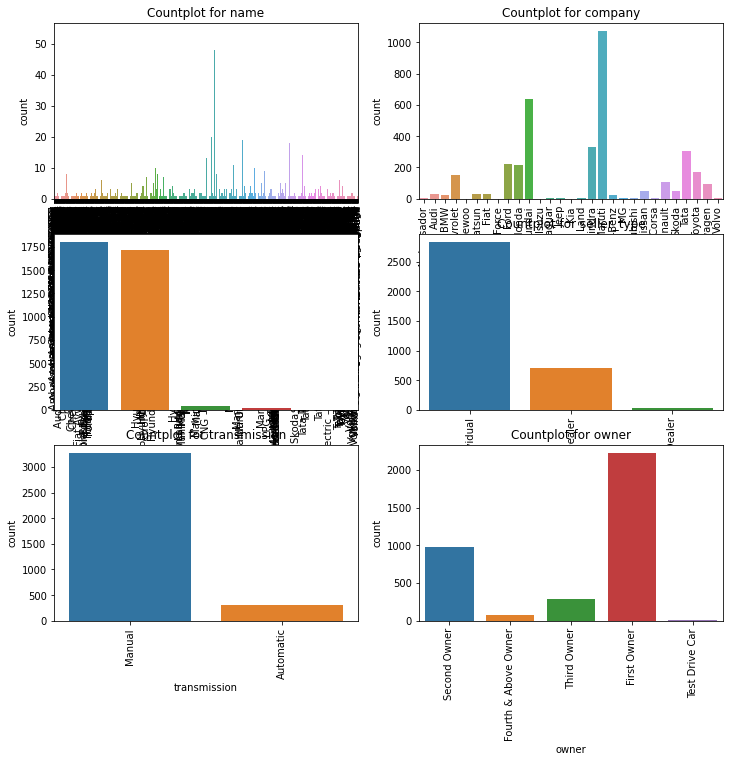

In [27]:
plt.figure(figsize=(12,11))
for i in range (len(categorical_columns)):
    plt.subplot(3,2,i+1)
    sns.countplot(x=df[categorical_columns[i]])
    plt.xticks(rotation=90)
    plt.title(f'Countplot for {categorical_columns[i]}')
plt.tight_layout(h_pad=2.0)
plt.show()

#### Select x and y

In [28]:
X=transformer.fit_transform(df.drop('selling_price',axis =1))
y=df['selling_price'].values

In [29]:
# Splitting data into 70% train and 30% test sets								
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=499)	

#### Creating a function to evaluate the model

In [30]:
#training random forest model
regressor =RandomForestRegressor()
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [31]:
def mscore(model):
    print("TrainingScore",model.score(X_train,y_train))
    print("TestingScore",model.score(X_test,y_test))
    

In [32]:
mscore(regressor)

TrainingScore 0.9645005580271389
TestingScore 0.7752156830579644


In [33]:
# Create a Linear Regression model
linear_regressor = LinearRegression()

# Train the model on the training data
linear_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [34]:
mscore(linear_regressor)

TrainingScore 0.585701130379385
TestingScore 0.564716092662648


Saving model

In [35]:
pipeline = (transformer,regressor)
with open('car_pipeline.pkl','wb') as file:
    pickle.dump(pipeline,file)